# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

# Reading the data

In [2]:
# .csv files must be in same folder as this code if not then give the exact path name.

df1 = pd.read_csv("trainX.csv",header=None)      #Reading data of training set
df2 = pd.read_csv("trainY.csv",header=None)      #Reading labels of training set
df3 = pd.read_csv("testX.csv",header=None)       #Reading data of test set
df4 = pd.read_csv("testY.csv",header=None)       #Reading labels of test set

label_train=df2.values[:,0]                      #Labels of training set
label_test=df4.values[:,0]                       #Labels of test set
data_train=df1.values[:,0:29]                    #Data of training set
data_test=df3.values[:,0:29]                     #Data of test set
testaccuracy=[0]*10                              #Array for storing accuracy on test set for different size of training set
trainaccuracy=[0]*10                             #Array for storing accuracy on training set for different size of training set

# Function for calculating missclassifications

In [3]:
def missclass(label_test,label):
    correct0=0 #correctly classified to class 0
    correct1=0 #correctly classified to class 1
    wrong0=0   #misclassified to class 0
    wrong1=0   #misclassified to class 1
    for i in range(0,len(label)):
        if (label[i]==0):
            if label_test[i]==0:
                correct0+=1
            else:
                wrong0+=1
        else:
            if label_test[i]==1:
                correct1+=1
            else:
                wrong1+=1
    return correct0,correct1,wrong0,wrong1

# Function for Calculating Nodes and Leaf Nodes in a Graph

In [4]:
# Used http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html documentaion

def nodes(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

            n_leaves=np.sum(is_leaves==True)

    return int(n_nodes),int(n_leaves)

# Part (i)


### Classification using entropy as criteria

In [5]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(data_train, label_train)

### Exporting the tree in .dot format

In [6]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating Misclassification

In [7]:
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "------------------------------------"
print "Number of data points with label 0 and classified as label 0 :",correct0
print "Number of data points with label 0 and classified as label 1 :",wrong1
print "Number of data points with label 1 and classified as label 1 :",correct1
print "Number of data points with label 1 and classified as label 0 :",wrong0
print "------------------------------------"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('The misclassification rate for class 1 is %f '%(missclassification1) + '%')

------------------------------------
Number of data points with label 0 and classified as label 0 : 32
Number of data points with label 0 and classified as label 1 : 0
Number of data points with label 1 and classified as label 1 : 22
Number of data points with label 1 and classified as label 0 : 3
------------------------------------
The misclassification rate for class 0 is 0.000000 %
The misclassification rate for class 1 is 12.000000 %


### Confusion Matrix

In [8]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             32              0
 Actual Label 1              3             22


### The Resulting Decision Tree

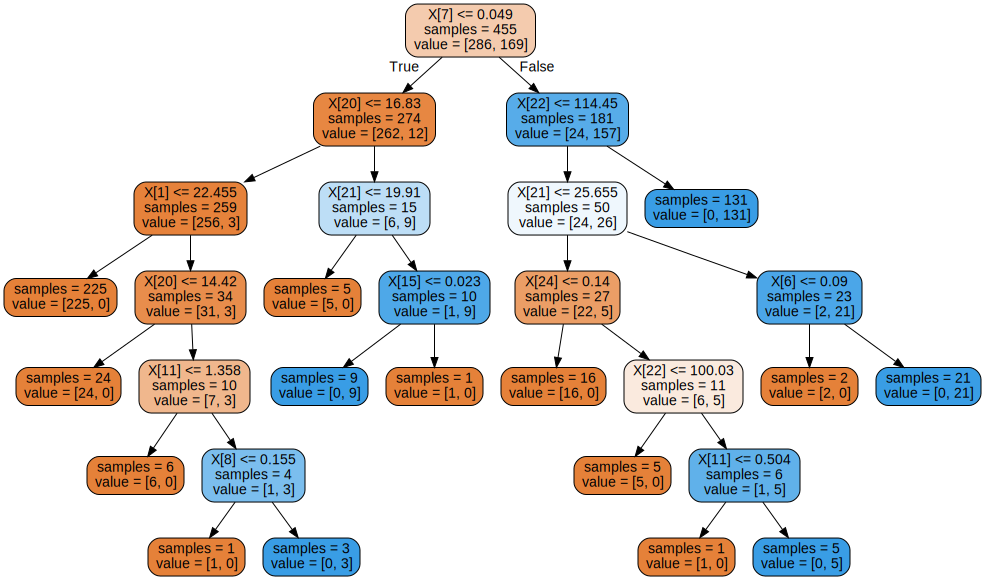

In [9]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('Decision Tree')
graphviz.Source(dot_graph)                #Prining the decision tree 

### Nodes and Leaf Nodes

In [10]:
totalnodes,leaf=nodes(clf)
print "Total Number of Nodes :",totalnodes
print "Total Number of Leaf Nodes :",leaf

Total Number of Nodes : 29
Total Number of Leaf Nodes : 15


# Part (ii)

## Case 1: 10% of training data

### Splitting

In [11]:
l=len(data_train)*10/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [12]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [13]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [14]:
print "------------------------------------"
print "CASE 1: 10% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[0]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[0],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[0]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[0],"%"
print "     ------------------------------------"

------------------------------------
CASE 1: 10% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 28
     Number of data points with label 0 and classified as label 1 : 4
     Number of data points with label 1 and classified as label 1 : 19
     Number of data points with label 1 and classified as label 0 : 6
     ------------------------------------


     The misclassification rate for class 0 is 12.500000 %
     The misclassification rate for class 1 is 24.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 82.4561403509 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 23
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 22
     Number

### Confusion Matrix

In [15]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             28              4
 Actual Label 1              6             19


### The Resulting Decision Tree

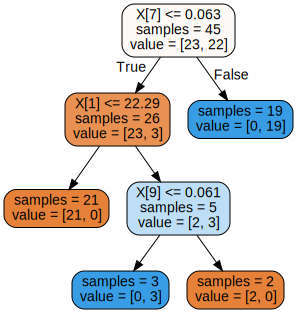

In [16]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 1')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [17]:
totalnodes1,leaf1=nodes(clf)
print "Total Number of Nodes :",totalnodes1
print "Total Number of Leaf Nodes :",leaf1

Total Number of Nodes : 7
Total Number of Leaf Nodes : 4


## Case 2: 20% of training data

### Splitting

In [18]:
l=len(data_train)*20/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [19]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [20]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [21]:
print "------------------------------------"
print "CASE 2: 20% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[1]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[1],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[1]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[1],"%"
print "     ------------------------------------"

------------------------------------
CASE 2: 20% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 31
     Number of data points with label 0 and classified as label 1 : 1
     Number of data points with label 1 and classified as label 1 : 21
     Number of data points with label 1 and classified as label 0 : 4
     ------------------------------------


     The misclassification rate for class 0 is 3.125000 %
     The misclassification rate for class 1 is 16.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 91.2280701754 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 56
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 35
     Number 

### Confusion Matrix

In [22]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             31              1
 Actual Label 1              4             21


### The Resulting Decision Tree

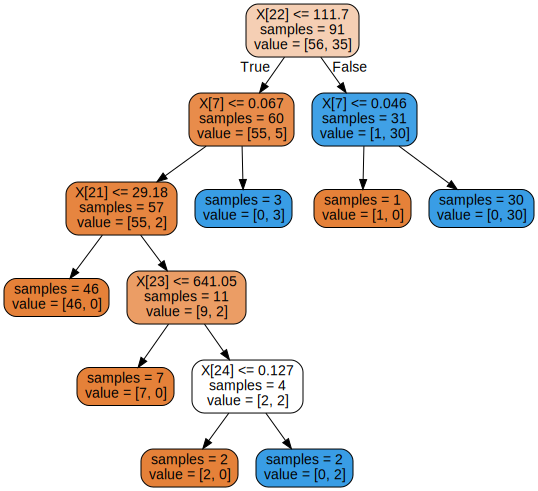

In [23]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 2')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [24]:
totalnodes2,leaf2=nodes(clf)
print "Total Number of Nodes :",totalnodes2
print "Total Number of Leaf Nodes :",leaf2

Total Number of Nodes : 13
Total Number of Leaf Nodes : 7


## Case 3: 30% of training data

### Splitting

In [25]:
l=len(data_train)*30/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [26]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [27]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [28]:
print "------------------------------------"
print "CASE 3: 30% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[2]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[2],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[2]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[2],"%"
print "     ------------------------------------"

------------------------------------
CASE 3: 30% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 30
     Number of data points with label 0 and classified as label 1 : 2
     Number of data points with label 1 and classified as label 1 : 21
     Number of data points with label 1 and classified as label 0 : 4
     ------------------------------------


     The misclassification rate for class 0 is 6.250000 %
     The misclassification rate for class 1 is 16.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 89.4736842105 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 80
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 56
     Number 

### Confusion Matrix

In [29]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             30              2
 Actual Label 1              4             21


### The Resulting Decision Tree

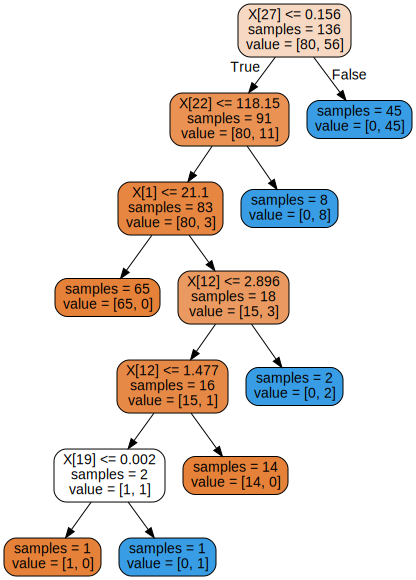

In [30]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 3')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [31]:
totalnodes3,leaf3=nodes(clf)
print "Total Number of Nodes :",totalnodes3
print "Total Number of Leaf Nodes :",leaf3

Total Number of Nodes : 13
Total Number of Leaf Nodes : 7


## Case 4: 40% of training data

### Splitting

In [32]:
l=len(data_train)*40/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [33]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [34]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [35]:
print "------------------------------------"
print "CASE 4: 40% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[3]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[3],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[3]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[3],"%"
print "     ------------------------------------"

------------------------------------
CASE 4: 40% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 29
     Number of data points with label 0 and classified as label 1 : 3
     Number of data points with label 1 and classified as label 1 : 21
     Number of data points with label 1 and classified as label 0 : 4
     ------------------------------------


     The misclassification rate for class 0 is 9.375000 %
     The misclassification rate for class 1 is 16.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 87.7192982456 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 112
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 70
     Number

### Confusion Matrix


In [36]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             29              3
 Actual Label 1              4             21


### The Resulting Decision Tree

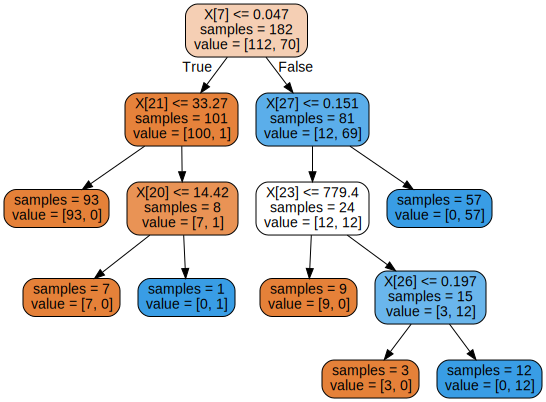

In [37]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 4')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [38]:
totalnodes4,leaf4=nodes(clf)
print "Total Number of Nodes :",totalnodes4
print "Total Number of Leaf Nodes :",leaf4

Total Number of Nodes : 13
Total Number of Leaf Nodes : 7


## Case 5: 50% of training data

### Splitting

In [39]:
l=len(data_train)*50/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [40]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [41]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [42]:
print "------------------------------------"
print "CASE 5: 50% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[4]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[4],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[4]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[4],"%"
print "     ------------------------------------"

------------------------------------
CASE 5: 50% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 29
     Number of data points with label 0 and classified as label 1 : 3
     Number of data points with label 1 and classified as label 1 : 21
     Number of data points with label 1 and classified as label 0 : 4
     ------------------------------------


     The misclassification rate for class 0 is 9.375000 %
     The misclassification rate for class 1 is 16.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 87.7192982456 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 137
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 90
     Number

### Confusion Matrix

In [43]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             29              3
 Actual Label 1              4             21


### The Resulting Decision Tree

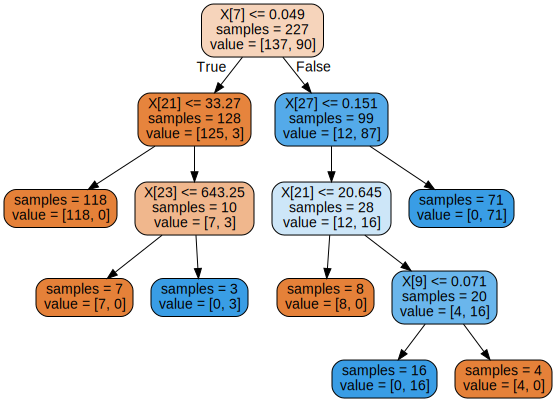

In [44]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 5')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [45]:
totalnodes5,leaf5=nodes(clf)
print "Total Number of Nodes :",totalnodes5
print "Total Number of Leaf Nodes :",leaf5

Total Number of Nodes : 13
Total Number of Leaf Nodes : 7


## Case 6: 60% of training data

### Splitting

In [46]:
l=len(data_train)*60/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [47]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [48]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [49]:
print "------------------------------------"
print "CASE 6: 60% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[5]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[5],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[5]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[5],"%"
print "     ------------------------------------"

------------------------------------
CASE 6: 60% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 29
     Number of data points with label 0 and classified as label 1 : 3
     Number of data points with label 1 and classified as label 1 : 22
     Number of data points with label 1 and classified as label 0 : 3
     ------------------------------------


     The misclassification rate for class 0 is 9.375000 %
     The misclassification rate for class 1 is 12.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 89.4736842105 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 171
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 102
     Numbe

### Confusion Matrix

In [50]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             29              3
 Actual Label 1              3             22


### The Resulting Decision Tree

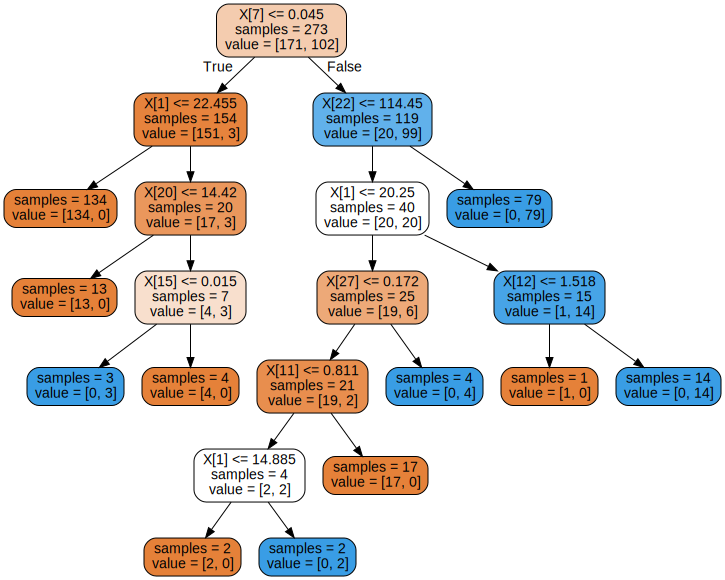

In [51]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 6')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [52]:
totalnodes6,leaf6=nodes(clf)
print "Total Number of Nodes :",totalnodes6
print "Total Number of Leaf Nodes :",leaf6

Total Number of Nodes : 21
Total Number of Leaf Nodes : 11


## Case 7: 70% of training data

### Splitting

In [53]:
l=len(data_train)*70/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [54]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [55]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [56]:
print "------------------------------------"
print "CASE 7: 70% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[6]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[6],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[6]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[6],"%"
print "     ------------------------------------"

------------------------------------
CASE 7: 70% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 29
     Number of data points with label 0 and classified as label 1 : 3
     Number of data points with label 1 and classified as label 1 : 21
     Number of data points with label 1 and classified as label 0 : 4
     ------------------------------------


     The misclassification rate for class 0 is 9.375000 %
     The misclassification rate for class 1 is 16.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 87.7192982456 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 197
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 121
     Numbe

### Confusion Matrix

In [57]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             29              3
 Actual Label 1              4             21


### The Resulting Decision Tree

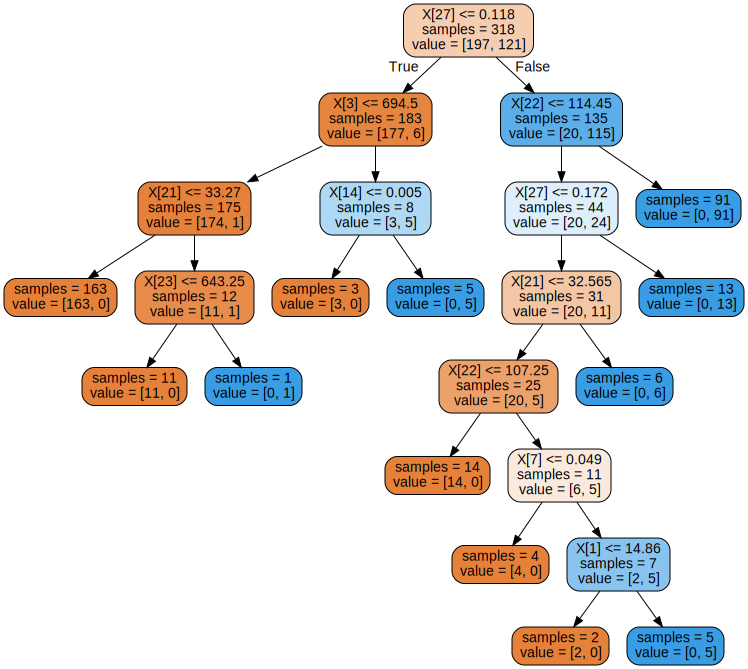

In [58]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 7')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [59]:
totalnodes7,leaf7=nodes(clf)
print "Total Number of Nodes :",totalnodes7
print "Total Number of Leaf Nodes :",leaf7

Total Number of Nodes : 23
Total Number of Leaf Nodes : 12


## Case 8: 80% of training data

### Splitting

In [60]:
l=len(data_train)*80/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [61]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [62]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [63]:
print "------------------------------------"
print "CASE 8: 80% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[7]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[7],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[7]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[7],"%"
print "     ------------------------------------"

------------------------------------
CASE 8: 80% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 31
     Number of data points with label 0 and classified as label 1 : 1
     Number of data points with label 1 and classified as label 1 : 23
     Number of data points with label 1 and classified as label 0 : 2
     ------------------------------------


     The misclassification rate for class 0 is 3.125000 %
     The misclassification rate for class 1 is 8.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 94.7368421053 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 230
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 134
     Number

### Confusion Matrix

In [64]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             31              1
 Actual Label 1              2             23


### The Resulting Decision Tree

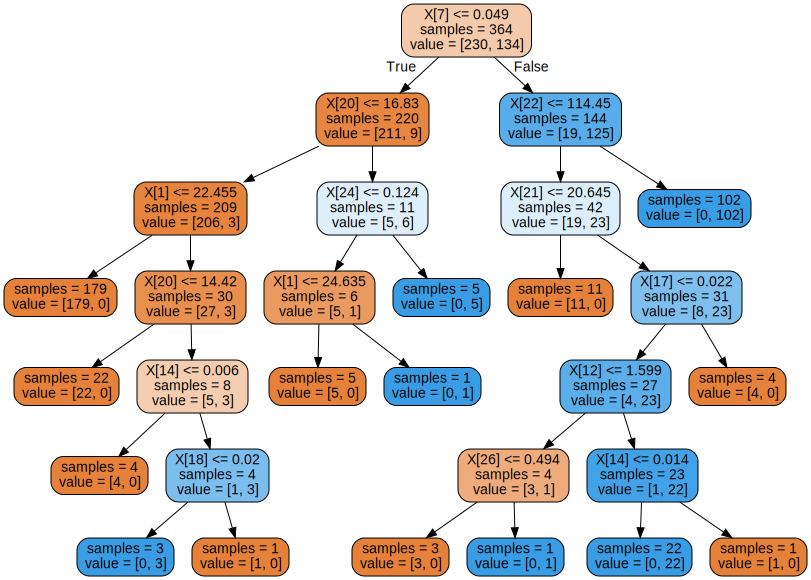

In [65]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 8')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [66]:
totalnodes8,leaf8=nodes(clf)
print "Total Number of Nodes :",totalnodes8
print "Total Number of Leaf Nodes :",leaf8

Total Number of Nodes : 29
Total Number of Leaf Nodes : 15


## Case 9: 90% of training data

### Splitting

In [67]:
l=len(data_train)*90/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [68]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [69]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [70]:
print "------------------------------------"
print "CASE 9: 90% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[8]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[8],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[8]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[8],"%"
print "     ------------------------------------"

------------------------------------
CASE 9: 90% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 29
     Number of data points with label 0 and classified as label 1 : 3
     Number of data points with label 1 and classified as label 1 : 22
     Number of data points with label 1 and classified as label 0 : 3
     ------------------------------------


     The misclassification rate for class 0 is 9.375000 %
     The misclassification rate for class 1 is 12.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 89.4736842105 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 258
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 151
     Numbe

### Confusion Matrix

In [71]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             29              3
 Actual Label 1              3             22


### The Resulting Decision Tree

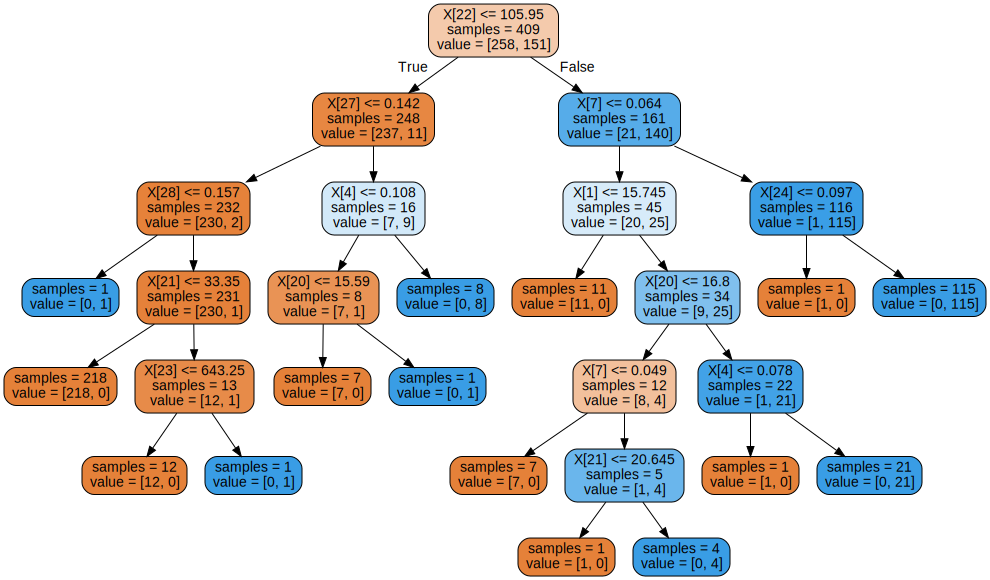

In [72]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 9')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [73]:
totalnodes9,leaf9=nodes(clf)
print "Total Number of Nodes :",totalnodes9
print "Total Number of Leaf Nodes :",leaf9

Total Number of Nodes : 29
Total Number of Leaf Nodes : 15


## Case 10: 100% of training data

### Splitting

In [74]:
l=len(data_train)*100/100                #length of new training set
newtrain=data_train[0:l]                #New training data
newlabel=label_train[0:l]               #New training labels

### Classification using entropy as criteria

In [75]:
clf = DecisionTreeClassifier(criterion = "entropy",splitter="best")
clf = clf.fit(newtrain, newlabel)

### Exporting the tree in .dot format

In [76]:
tree.export_graphviz(clf,out_file="mytree.dot",impurity=False,filled=True,rounded=True)

### Calculating accuracy and missclassification rate for training and test sets

In [77]:
print "------------------------------------"
print "CASE 10: 100% of Training Set"
print "------------------------------------"
print "\n"
print "For Test set"
label=clf.predict(data_test, check_input=True)
correct0,correct1,wrong0,wrong1=missclass(label_test,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct0
print "     Number of data points with label 0 and classified as label 1 :",wrong1
print "     Number of data points with label 1 and classified as label 1 :",correct1
print "     Number of data points with label 1 and classified as label 0 :",wrong0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
testaccuracy[9]=(float(correct0+correct1)/(correct0+correct1+wrong0+wrong1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on test set is:",testaccuracy[9],"%"
print "     ------------------------------------"
print "\n"
print "For Training set"
label=clf.predict(newtrain, check_input=True)
correct_0,correct_1,wrong_0,wrong_1=missclass(newlabel,label)
print "----------------"
print "\n"
print "     Number of data points with label 0 and classified as label 0 :",correct_0
print "     Number of data points with label 0 and classified as label 1 :",wrong_1
print "     Number of data points with label 1 and classified as label 1 :",correct_1
print "     Number of data points with label 1 and classified as label 0 :",wrong_0
print "     ------------------------------------"
print "\n"
missclassification0=(float(wrong_1)/(wrong_1+correct_0))*100
missclassification1=(float(wrong_0)/(wrong_0+correct_1))*100
print('     The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('     The misclassification rate for class 1 is %f '%(missclassification1) + '%')
trainaccuracy[9]=(float(correct_0+correct_1)/(correct_0+correct_1+wrong_0+wrong_1))*100

print "     ------------------------------------"
print "\n"
print "     Accuracy of resulting decision tree on training set is:",trainaccuracy[9],"%"
print "     ------------------------------------"

------------------------------------
CASE 10: 100% of Training Set
------------------------------------


For Test set
----------------


     Number of data points with label 0 and classified as label 0 : 30
     Number of data points with label 0 and classified as label 1 : 2
     Number of data points with label 1 and classified as label 1 : 22
     Number of data points with label 1 and classified as label 0 : 3
     ------------------------------------


     The misclassification rate for class 0 is 6.250000 %
     The misclassification rate for class 1 is 12.000000 %
     ------------------------------------


     Accuracy of resulting decision tree on test set is: 91.2280701754 %
     ------------------------------------


For Training set
----------------


     Number of data points with label 0 and classified as label 0 : 286
     Number of data points with label 0 and classified as label 1 : 0
     Number of data points with label 1 and classified as label 1 : 169
     Num

### Confusion Matrix

In [78]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [wrong0,correct1]])
# Printing the Confusion Matrix

print('The Confusion Matrix is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             30              2
 Actual Label 1              3             22


### The Resulting Decision Tree

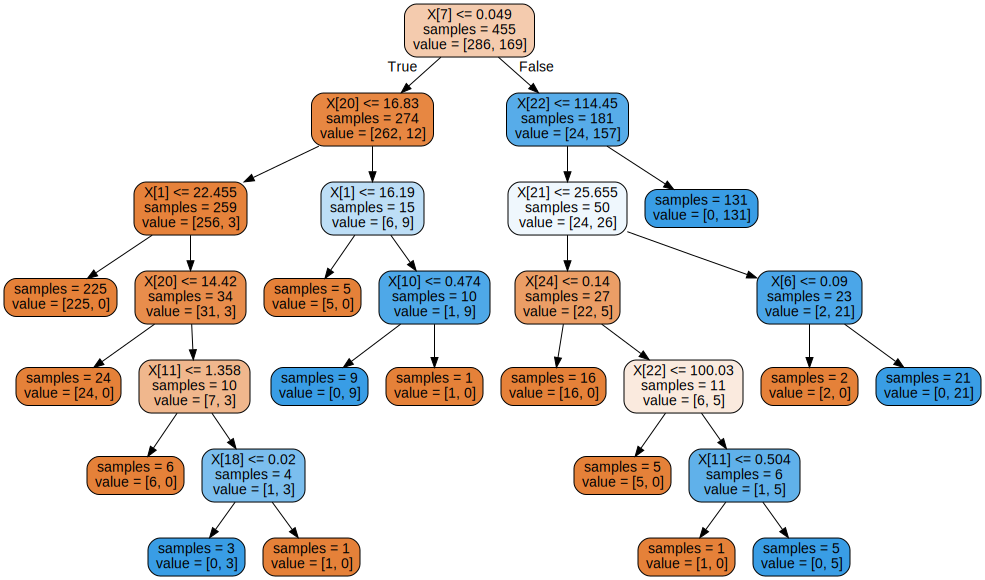

In [79]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('CASE 10')
graphviz.Source(dot_graph)                #Prining the decision tree

### Nodes and Leaf Nodes

In [80]:
totalnodes10,leaf10=nodes(clf)
print "Total Number of Nodes :",totalnodes10
print "Total Number of Leaf Nodes :",leaf10

Total Number of Nodes : 29
Total Number of Leaf Nodes : 15


## Table Showing accuracy of training and testing data with varying size of training set

In [81]:
a=[]
for i in range(0,len(trainaccuracy)):
    a.append(["          "+str(i*10)+"%"+"          ",trainaccuracy[i],testaccuracy[i]])
a = np.matrix(a)

# Printing the Table

a= np.array(a)
UpperTitle = ["  Size of Training Set", "  Train Accuracy", "  Test Accuracy"]
LeftTitle=[]
for i in range(1,11):
    LeftTitle.append(str(i)+".")
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, a):
    print row_format.format(x, *row)

                 Size of Training Set  Train Accuracy  Test Accuracy
             1.          0%                    100.0  82.4561403509
             2.          10%                    100.0  91.2280701754
             3.          20%                    100.0  89.4736842105
             4.          30%                    100.0  87.7192982456
             5.          40%                    100.0  87.7192982456
             6.          50%                    100.0  89.4736842105
             7.          60%                    100.0  87.7192982456
             8.          70%                    100.0  94.7368421053
             9.          80%                    100.0  89.4736842105
            10.          90%                    100.0  91.2280701754


## Plot of Accuracies with Size of Training Data

----------------------------------------------------------
Accuracies vary with number of training samples.
----------------------------------------------------------


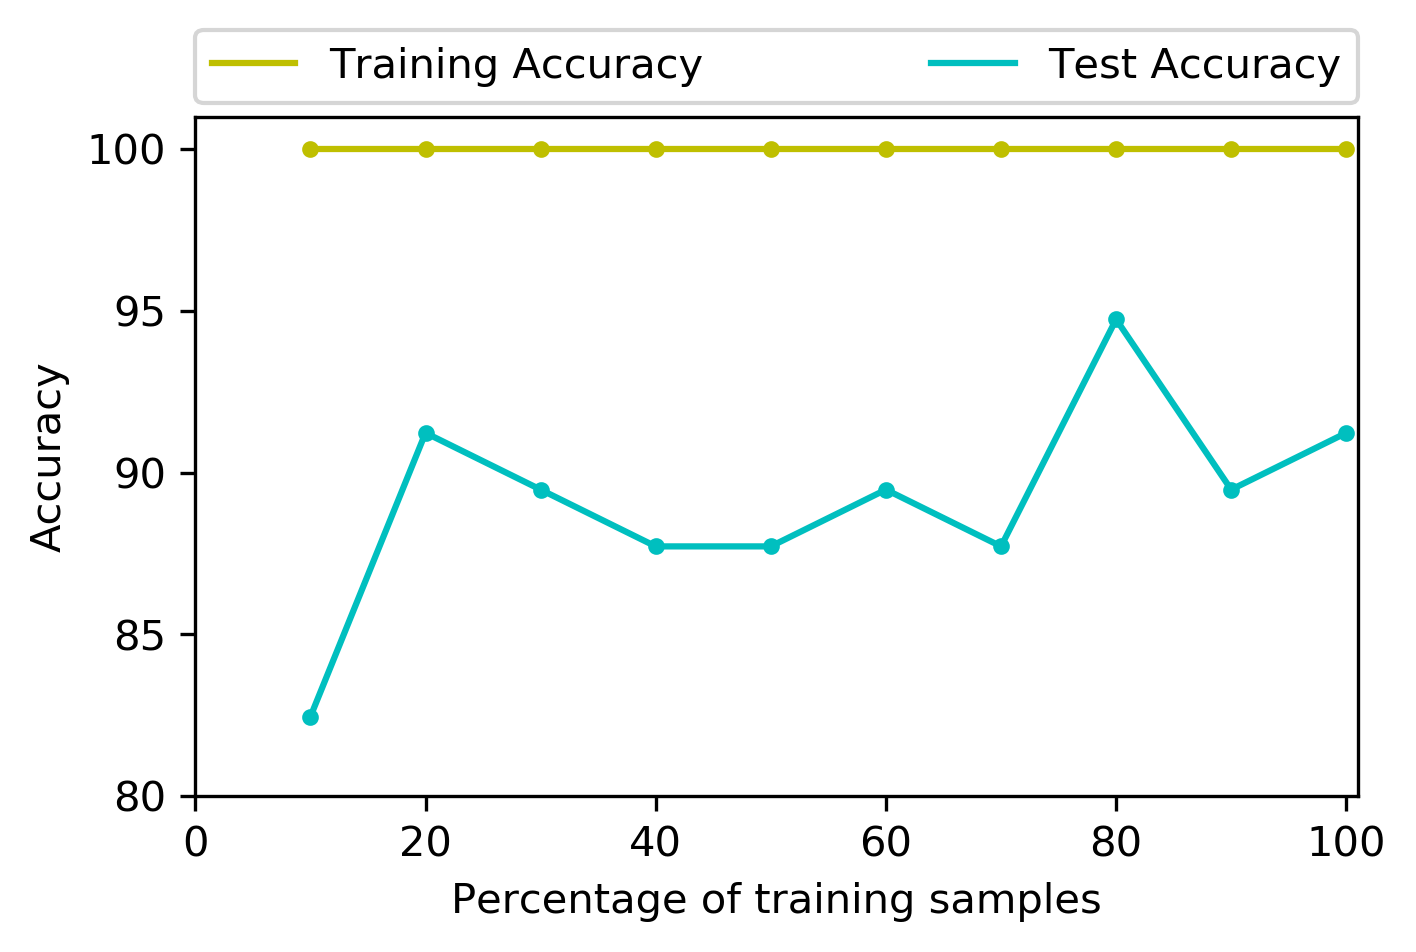

In [82]:
print "----------------------------------------------------------"
print "Accuracies vary with number of training samples."
print "----------------------------------------------------------"
plt.figure(figsize=(5,3),dpi=300)
plt.plot([10,20,30,40,50,60,70,80,90,100],trainaccuracy , 'y.')
plot1=plt.plot([10,20,30,40,50,60,70,80,90,100],trainaccuracy , 'y-',label="Training Accuracy")
plt.plot([10,20,30,40,50,60,70,80,90,100],testaccuracy , 'c.')
plot2=plt.plot([10,20,30,40,50,60,70,80,90,100],testaccuracy , 'c-',label="Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Percentage of training samples')
plt.axis([0, 101, 80, 101])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.show()

# Conclusion

1. In above experiment Entropy is used as the criteria for making the decision tree.

2. We see the training accuracy is 100% which has to be 100% because decision tree learns the training data exactly.

3. Number of Nodes increases as we increase the size of training data.

